In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.optimize import fsolve
from sklearn.neighbors import NearestNeighbors
from tqdm.notebook import tqdm

from quadrics.quadrics_wrapper import Quadrics

%matplotlib inline

(-2.5, 2.5)

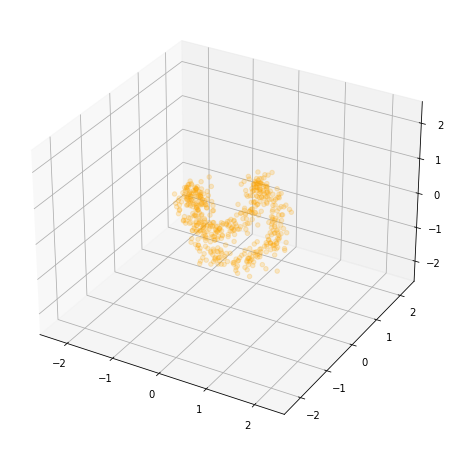

In [2]:
np.random.seed(48)
size, outliers_size = 500, 1
r, p = 1, 0.8
a, b = p*r, (1 - p)*r
t = np.random.uniform(0, 2*np.pi, size)

x_line = a*np.cos(t) + b*np.cos(3*t)
y_line = a*np.sin(t) - b*np.sin(3*t)
z_line = 2*np.sqrt(a*b)*np.sin(2*t)

true_points = np.stack([x_line, y_line, z_line]).T

# noise
noise = np.random.normal(scale=0.12*r, size=(size, 3))
noised_points = true_points + noise

outliers = np.random.normal(scale=1, size=(3, outliers_size))
outliers = 2 * outliers/np.linalg.norm(outliers, axis=0) #+ outliers_n
points = np.vstack([noised_points, outliers.T])
points = np.random.permutation(points)

t_curve = np.linspace(-np.pi, np.pi, 50)
x_curve = a*np.cos(t_curve) + b*np.cos(3*t_curve)
y_curve = a*np.sin(t_curve) - b*np.sin(3*t_curve)
z_curve = 2*np.sqrt(a*b)*np.sin(2*t_curve)

x, y, z = points.T

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.2, c='orange')

scale = 2.5
xmin, xmax, ymin, ymax, zmin, zmax = (-scale, scale)*3

ax.set_zlim3d(zmin,zmax)
ax.set_xlim3d(xmin,xmax)
ax.set_ylim3d(ymin,ymax)

In [3]:
quadrics = Quadrics(n_quadrics=2, dist='dist2_full', device='gpu')
quadrics.fit(points, 500, learning_rate=0.02, batch_size=20)

Epoch  1
Orthonormal error: 0.00026475940831005573
Epoch  2
Orthonormal error: 0.0008388041751459241
Epoch  3
Orthonormal error: 0.0005959898699074984
Epoch  4
Orthonormal error: 0.0008129086927510798
Epoch  5
Orthonormal error: 0.0009101384785026312
Epoch  6
Orthonormal error: 0.0008488401072099805
Epoch  7
Orthonormal error: 0.0009110701503232121
Epoch  8
Orthonormal error: 0.0012815443333238363
Epoch  9
Orthonormal error: 0.00027084260364063084
Epoch  10
Orthonormal error: 0.0003608422994147986
Epoch  11
Orthonormal error: 0.0005436837673187256
Epoch  12
Orthonormal error: 0.00012150115799158812
Epoch  13
Orthonormal error: 0.0010321593144908547
Epoch  14
Orthonormal error: 0.00018983114568982273
Epoch  15
Orthonormal error: 9.337932715425268e-05
Epoch  16
Orthonormal error: 0.0001074691244866699
Epoch  17
Orthonormal error: 0.00027240594499744475
Epoch  18
Orthonormal error: 2.6328845706302673e-05
Epoch  19
Orthonormal error: 0.0018578259041532874
Epoch  20
Orthonormal error: 0.000

Orthonormal error: 0.0005316879833117127
Epoch  162
Orthonormal error: 0.0011190325021743774
Epoch  163
Orthonormal error: 0.0004093943862244487
Epoch  164
Orthonormal error: 0.0004796776338480413
Epoch  165
Orthonormal error: 0.0005914658540859818
Epoch  166
Orthonormal error: 0.00013931814464740455
Epoch  167
Orthonormal error: 0.0006769481115043163
Epoch  168
Orthonormal error: 0.0007323430618271232
Epoch  169
Orthonormal error: 0.0005358527414500713
Epoch  170
Orthonormal error: 0.0003342960844747722
Epoch  171
Orthonormal error: 0.00015462262672372162
Epoch  172
Orthonormal error: 0.00044763661571778357
Epoch  173
Orthonormal error: 0.0004451097338460386
Epoch  174
Orthonormal error: 0.0006639647763222456
Epoch  175
Orthonormal error: 0.0004025442467536777
Epoch  176
Orthonormal error: 0.000605715555138886
Epoch  177
Orthonormal error: 0.0004883547080680728
Epoch  178
Orthonormal error: 0.00012834096560254693
Epoch  179
Orthonormal error: 0.0005517589161172509
Epoch  180
Orthonorm

Orthonormal error: 0.0010314842220395803
Epoch  322
Orthonormal error: 0.0004724609316326678
Epoch  323
Orthonormal error: 0.000506476906593889
Epoch  324
Orthonormal error: 0.0006564888171851635
Epoch  325
Orthonormal error: 0.0003436657425481826
Epoch  326
Orthonormal error: 0.00022530462592840195
Epoch  327
Orthonormal error: 0.0011483170092105865
Epoch  328
Orthonormal error: 0.0002689897664822638
Epoch  329
Orthonormal error: 0.000579020706936717
Epoch  330
Orthonormal error: 0.00034284760477021337
Epoch  331
Orthonormal error: 0.0014830909203737974
Epoch  332
Orthonormal error: 0.0008734908769838512
Epoch  333
Orthonormal error: 0.00030390507890842855
Epoch  334
Orthonormal error: 0.00015950913075357676
Epoch  335
Orthonormal error: 0.000979902921244502
Epoch  336
Orthonormal error: 0.00038474577013403177
Epoch  337
Orthonormal error: 0.0006102690240368247
Epoch  338
Orthonormal error: 0.00040161004289984703
Epoch  339
Orthonormal error: 0.0006152354762889445
Epoch  340
Orthonorm

Orthonormal error: 0.0007037512841634452
Epoch  482
Orthonormal error: 0.0006365984445437789
Epoch  483
Orthonormal error: 0.0005361798102967441
Epoch  484
Orthonormal error: 0.00015982853074092418
Epoch  485
Orthonormal error: 0.0004579982196446508
Epoch  486
Orthonormal error: 0.0003723633708432317
Epoch  487
Orthonormal error: 0.0008497682865709066
Epoch  488
Orthonormal error: 0.000335301854647696
Epoch  489
Orthonormal error: 0.0006222720840014517
Epoch  490
Orthonormal error: 0.0007137133507058024
Epoch  491
Orthonormal error: 0.0006633659359067678
Epoch  492
Orthonormal error: 0.0006230928702279925
Epoch  493
Orthonormal error: 0.0005289246328175068
Epoch  494
Orthonormal error: 0.00044351856922730803
Epoch  495
Orthonormal error: 0.00046735990326851606
Epoch  496
Orthonormal error: 0.0005913611967116594
Epoch  497
Orthonormal error: 0.0007311302470043302
Epoch  498
Orthonormal error: 0.0007432143902406096
Epoch  499
Orthonormal error: 0.00037620391231030226
Epoch  500
Orthonorm

In [4]:
class GridSolver:
    
    def __init__(self, equations, grid, tolerance=1e-6):
        self.tolerance = tolerance
        self.grid = grid
        self.equations = equations
        self.solutions = set()
        
    def _add(self, solution):
        for sol in self.solutions:
            if (abs(sol[0] - solution[0]) + abs(sol[1] - solution[1])) < self.tolerance:
                return
        self.solutions.add(solution)
        
    def find(self):
        self.solutions = set()
        for p in self.grid:
            sol, d, eir, msg = fsolve(self.equations, p, full_output=True)
            if eir==1:
                self._add((sol[0], sol[1]))
        return self.solutions

In [5]:
x = np.linspace(-2, 2, num=10)
y = np.linspace(-2, 2, num=10)
grid = np.array(np.meshgrid(x, y)).reshape((2, -1)).T
z = np.linspace(-2, 2, num=100)

q_points = []
for z_0 in tqdm(z):
    def equations(p):
        x, y = p
        p_0 = np.array([x, y, z_0])
        return quadrics.get_distances(p_0, dist='dist0')
    gs = GridSolver(equations, grid)
    sols = gs.find()
    for p in sols:
        x, y = p
        q_points.append((x, y, z_0))

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
def get_points_line(points, k=10):

    # eps = 1e-1

    blocks = []
    N = points.shape[0]
    neigh = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neigh.fit(points)
    nearest = neigh.kneighbors(points, return_distance=False)

    first = 0
    second = nearest[first][1]
    next_point = [first, second]
    used = [second]
    while (len(used) < N):
        current = next_point[-1]
        new_points = [p for p in nearest[current] if p not in used]
        if len(new_points) > 0:
            next_point.append(new_points[0])
            used.append(new_points[0])
        else:
            new_points = [p for p in nearest[first] if p not in used]
            if len(new_points) > 0:
                next_point = next_point[::-1]
                next_point.append(new_points[0])
                used.append(new_points[0])
            else:
#                 used.append(first)
                blocks.append(points[next_point])
                new_block = [i for i in range(N) if i not in used]
                first = new_block[0]
                second = nearest[first][1]
                next_point = [first, second]
                used.append(second)

    blocks.append(points[next_point])

    return blocks

In [7]:
bloks = get_points_line(np.array(q_points))

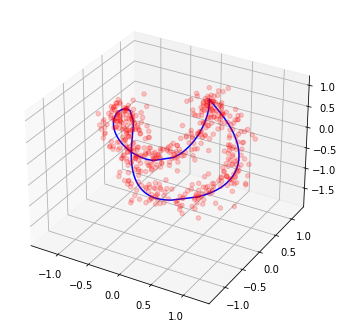

In [8]:
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=-0.05, right=1.05, bottom=-0.5, top=1.5)
ax = fig.add_subplot(111, projection='3d')

x, y, z = points.T
ax.scatter(x, y, z, alpha=0.2, c='red')

# dist2 solution
for block in bloks:
    ax.plot(block[:,0], block[:,1], block[:, 2], c = 'blue')